## Jungo simetrizatorių pavyzdys

<a href="https://colab.research.google.com/github/uqglmn/groups/blob/main/Pavyzdys_S3_Jungo_simetrizatoriai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Šiame pavyzdyje Jungo simetrizatorių pagalba blok-diagonalizuosime reguliarų $S_3$ įvaizdį. To pasekoje sukonstruosime visus neredukuojamus $S_3$ įvaizdžius.

In [1]:
# Bibliotekos
import sympy as sym
import numpy as np
from sympy.physics.quantum import TensorProduct

# Renderinimo nustatymas
sym.init_printing(use_unicode=True)

In [2]:
# Grupės S3 eilė
ng = 6

In [3]:
# funkcija vektorių normavimui
def normalise(v):
    n = 1/sym.sqrt((v.T * v)[0])
    return n*v

### Reguliarusis įvaizdis

In [4]:
# Grupės S3 algebros bazė
pe   = sym.Matrix([[1,0,0,0,0,0]]).T
p12  = sym.Matrix([[0,1,0,0,0,0]]).T
p23  = sym.Matrix([[0,0,1,0,0,0]]).T
p13  = sym.Matrix([[0,0,0,1,0,0]]).T
p123 = sym.Matrix([[0,0,0,0,1,0]]).T
p321 = sym.Matrix([[0,0,0,0,0,1]]).T

basis = [pe, p12, p23, p13, p123, p321]

In [5]:
# Reguliarus matricinis ivaizdis
Re   = sym.Matrix([[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]])
R12  = sym.Matrix([[0,1,0,0,0,0],[1,0,0,0,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1],[0,0,1,0,0,0],[0,0,0,1,0,0]])
R23  = sym.Matrix([[0,0,1,0,0,0],[0,0,0,0,0,1],[1,0,0,0,0,0],[0,0,0,0,1,0],[0,0,0,1,0,0],[0,1,0,0,0,0]])
R13  = sym.Matrix([[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1],[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0]])
R123 = sym.Matrix([[0,0,0,0,0,1],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,1,0,0,0,0],[1,0,0,0,0,0],[0,0,0,0,1,0]])
R321 = sym.Matrix([[0,0,0,0,1,0],[0,0,0,1,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,0,0,1],[1,0,0,0,0,0]])

rep_R = [Re, R12, R23, R13, R123, R321]

### Jungo simetrizatoriai

Grupė $S_3$ turi tris Jungo diagramas žymimas skirstiniais (3), (2,1) ir (1,1,1)

- Jungo diagrama (3) turi vieną standartinį tablo: [1,2,3]. Jis atitinka trivialų įvaizdį.
- Jungo diagrama (2,1) turi du standartinius tablo: [1,2][3] ir [1,3][2]. Jie atitinka standartinį įvaizdį.
- Jungo diagrama (1,1,1) turi vieną standartinį tablo: [1][2][3]. Jis atitinka alternuojantį įvaizdį.

Jungo simetrizatoriai:

$
Y_\Lambda = P_\Lambda Q_\Lambda
$

kur $P_\Lambda = \sum_{p \in R_{\Lambda}} p$ ir $Q_\Lambda = \sum_{p \in C_{\Lambda}} (-1)^p p$ yra eilučių ir stulpelių simetrizatoriai.

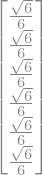

In [6]:
# Jungo tablo [1,2,3]
Row = Re + R12 + R23 + R13 + R123 + R321
Col = pe
Y_triv = normalise(Row * Col)
Y_triv

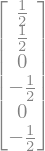

In [7]:
# Jungo tablo [1,2][3]
Row = Re + R12
Col = pe - p13
Y_st1 = normalise(Row * Col)
Y_st1

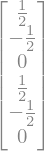

In [8]:
# Jungo tablo [1,3][2]
Row = Re + R13
Col = pe - p12
Y_st2 = normalise(Row * Col)
Y_st2

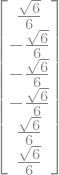

In [9]:
# Jungo tablo [1][2][3]
Row = Re
Col = pe - p12 - p23 - p13 + p123 + p321
Y_alt = normalise(Row * Col)
Y_alt

### Įvaizdžių konstravimas

Prisiminkite, kad

$
V_{\rm R} = V_{\rm triv} \oplus  V_{\rm alt} \oplus  V_{\rm st} \oplus  V_{\rm st}
$

Jungo simetrizatoriai, kuriuos sukonstravome aukščiau yra vektoriai šiuose įvaizdžiuose:

- $Y_{\rm triv} \in V_{\rm triv}$

- $Y_{\rm alt} \in V_{\rm alt}$

- $Y_{\rm st1} \in V_{\rm st}$ (pirmoje kopijoje)

- $Y_{\rm st2} \in V_{\rm st}$ (antroje kopijoje)

Mums tereikia surasti likusius du vektorius pirmoje ir antroje $V_{\rm st}$ kopijose.

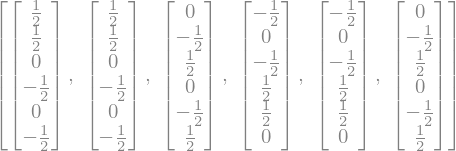

In [10]:
# veikiame su reguliariu įvaizdžiu į vektorių Y_st1 ir gauname vektorių sarašą apvelkantį pirmą erdvę V_st
B = []
for R in rep_R:
    B.append(R * Y_st1)
B

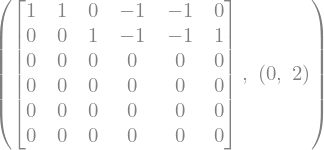

In [11]:
# Apvelkantį sąrašą paverčiame matrica
C = sym.Matrix(np.array(B).reshape(ng,ng)).T
# redukuota ešolono forma - iš jos matome, kad galime imti vektorius 1 ir 3 kaip tiesiškai nepriklausomus
C.rref()

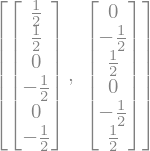

In [12]:
# Pirmos erdvės V_st bazė
B_st1 = [B[0], B[2]]
B_st1

In [13]:
# veikiame su reguliariu įvaizdžiu į vektorių Y_st2 ir gauname vektorių sarašą apvelkantį antrą erdvę V_st
B = []
for R in rep_R:
    B.append(R * Y_st2)

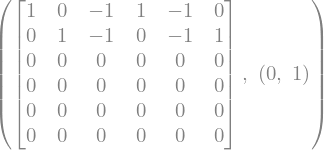

In [14]:
# Apvelkantį sąrašą paverčiame matrica
C = sym.Matrix(np.array(B).reshape(ng,ng)).T
# redukuota ešolono forma - iš jos matome, kad galime imti vektorius 1 ir 2 kaip tiesiškai nepriklausomus
C.rref()

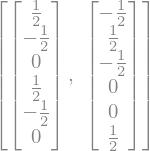

In [15]:
# Antros erdvės V_st bazė
B_st2 = [B[0], B[1]]
B_st2

### Reguliaraus įvaizdžio blok-diagonalizavimas

Atlikę aukščiau aprašytus veiksmus suradome bazę, kurioje reguliarus įvaizdis yra blok-diagonalus:

``
Nauja bazė = [ Y_triv, Y_alt, B_st1[0], B_st1[1], B_st2[0], B_st2[1] ]
``

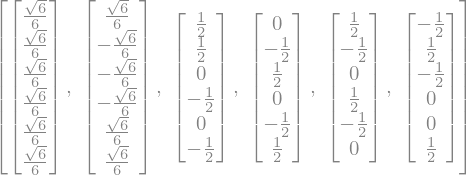

In [16]:
# Nauja reguliaraus įvaizdžio bazė
new_basis = [Y_triv, Y_alt] + B_st1 + B_st2
new_basis

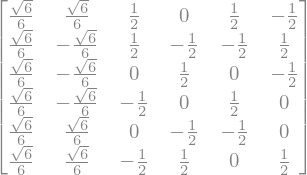

In [17]:
# Naują bazę paverčiame matrica
C = sym.Matrix(np.array(new_basis).reshape(ng,ng)).T
C

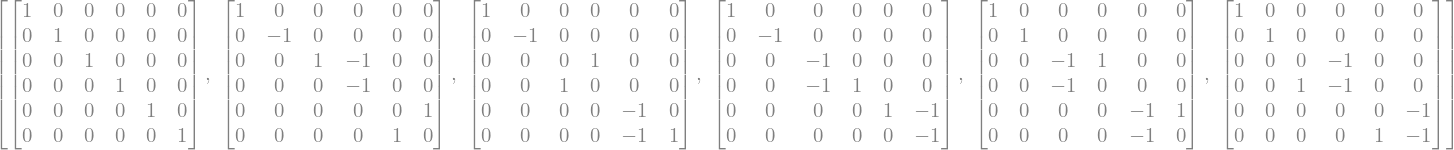

In [18]:
# Blok-diagonalizavimas
rep_R_bd = []
for i in range(6):
    rep_R_bd.append(C.inv()*rep_R[i]*C)
rep_R_bd

Gautas įvaizdis nėra unitarus. Mums reikia surasti panašumo transformacią, kuri unitarizuotų šį įvaizdį.

### Įvaizdžio unitarizavimas

Unitarizavimo procedūra:

$
\rho_V(g) \mapsto S \rho_V(g) S^{-1}
$

kur

$
S = \sqrt{\sum_{g \in G} \rho_V(g)^\dagger \rho_V(g)} 
$

Matricos kėlimas laipsniu:

$
M^a = P D^a P^{-1}
$

kur $D$ yra diagonali tikrinių verčių matrica, o $P$ - diagonalizavimo matrica.

In [19]:
# Apibrėžiame funkciją, kur suranda matricos šaknį
def matrix_sqrt(M):
    P, D = M.diagonalize()
    for i in range(D.shape[0]):
        D[i,i] = sym.sqrt(D[i,i])
    return P * D * P.inv()

In [20]:
# Ermitinis jungtinumas
from sympy.physics.quantum import Dagger

In [21]:
# Surandame unitarizavimo matricą
S = sym.zeros(6)
for R in rep_R_bd:
    S += Dagger(R) * R
S = matrix_sqrt(S)

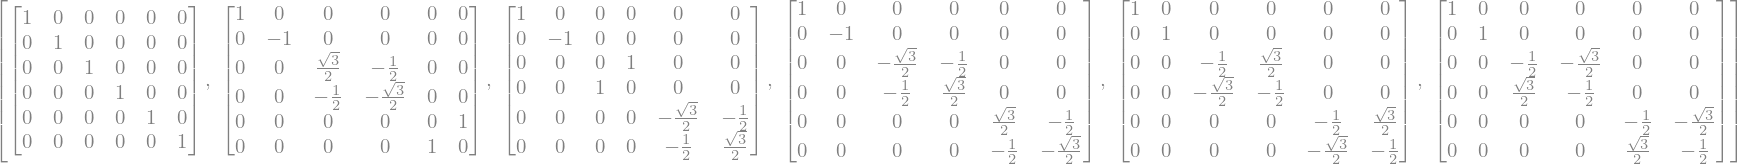

In [23]:
# Įvaizdžio unitarizavimas
rep_R_bdu = []
for i in range(6):
    rep_R_bdu.append(sym.simplify(S*rep_R_bd[i]*S.inv()))
rep_R_bdu